In [1]:
# Just to download Dataset
# from IPython.display import IFrame
# IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('C:/Users/Tirth/Desktop/Machine_learning/machine learning/my codes/Iris.data')

In [4]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
data.columns = ['SepalLength' , 'SepalWidth' , 'PetalLength' , 'PetalWidth' , 'Species']

In [6]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
data.shape

(149, 5)

In [8]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
SepalLength    149 non-null float64
SepalWidth     149 non-null float64
PetalLength    149 non-null float64
PetalWidth     149 non-null float64
Species        149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: Species, dtype: int64

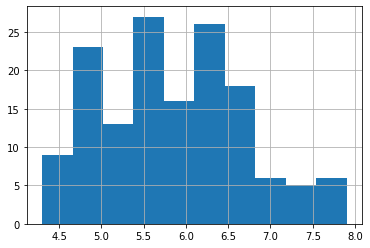

In [11]:
data['SepalLength'].hist()

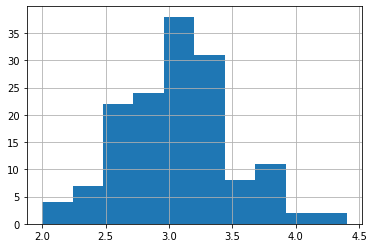

In [12]:
data['SepalWidth'].hist()

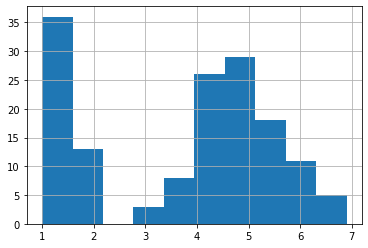

In [13]:
data['PetalLength'].hist()

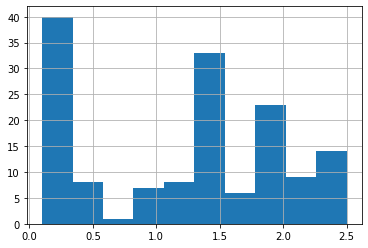

In [14]:
data['PetalWidth'].hist()

In [15]:
data['Species'] = data.Species.map({'Iris-versicolor':0 , 'Iris-virginica' : 1 , 'Iris-setosa' : 2})
# Other way to do the same
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data['Species'] = le.fit_transform(data['Species'])
# data.head()

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density. Either provide the bandwidth during initialization or use an alternative method.

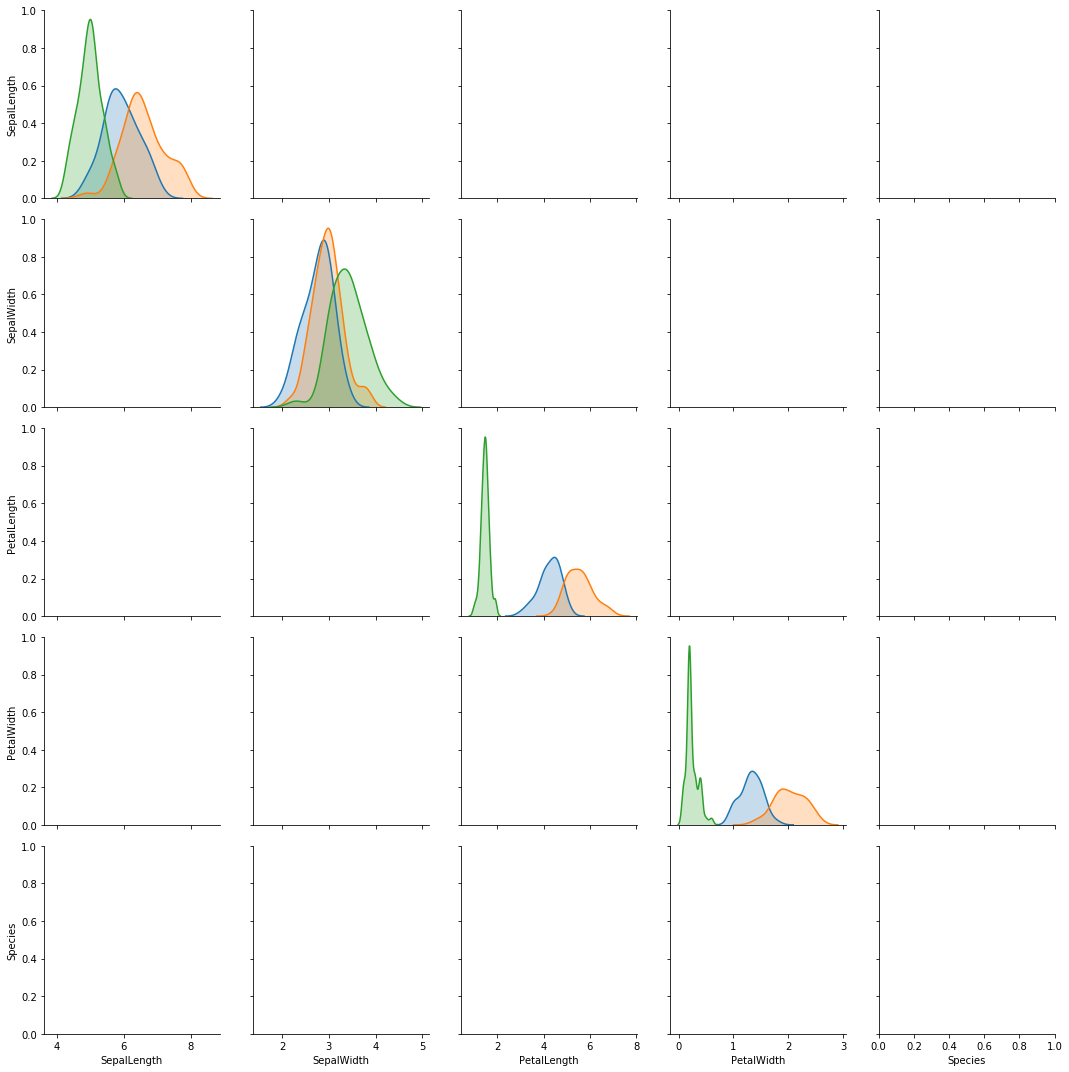

In [16]:
sns.pairplot(data=data , hue='Species', size=3)

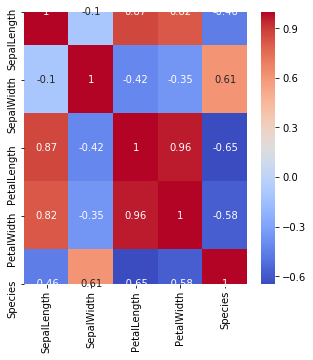

In [17]:
corr = data.corr()
fig , ax = plt.subplots(figsize = (5 , 5))
sns.heatmap(corr , annot = True , ax = ax , cmap = 'coolwarm')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
SepalLength    149 non-null float64
SepalWidth     149 non-null float64
PetalLength    149 non-null float64
PetalWidth     149 non-null float64
Species        149 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [19]:
from sklearn.model_selection import train_test_split
y = data['Species']
X = data.drop(['Species'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [20]:
X_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
97,5.1,2.5,3.0,1.1
58,5.2,2.7,3.9,1.4
35,5.5,3.5,1.3,0.2
134,7.7,3.0,6.1,2.3
46,4.6,3.2,1.4,0.2


In [21]:
y_train.head()

97     0
58     0
35     2
134    1
46     2
Name: Species, dtype: int64

---------------------------------------------Decision Tree Implementation------------------------------------------------------

In [22]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [23]:
model

DecisionTreeClassifier()

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# from sklearn import metrics
# metrics.accuracy_score(y_test , y_pred)

0.9555555555555556

In [27]:
pd.crosstab(y_test , y_pred , rownames = ['Actual Species'] , colnames = ['Predict Species'])

Predict Species,0,1,2
Actual Species,,,
0,14,2,0
1,0,16,0
2,0,0,13


-----------------------------------------Logistic Regression Implementation----------------------------------------------------

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [29]:
model.fit(X_train , y_train)

LogisticRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [32]:
pd.crosstab(y_test , y_pred , rownames = ['Actual Species'] , colnames = ['Predict Species'])

Predict Species,0,1,2
Actual Species,,,
0,15,1,0
1,0,16,0
2,0,0,13


---------------------------------------------------KNN Implementation----------------------------------------------------------

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [34]:
model.fit(X_train , y_train)

KNeighborsClassifier()

In [35]:
y_pred = model.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [37]:
pd.crosstab(y_test , y_pred , rownames = ['Actual Species'] , colnames = ['Predict Species'])

Predict Species,0,1,2
Actual Species,,,
0,15,1,0
1,0,16,0
2,0,0,13


---------------------------------------------------Naive Bayes(Gaussian)-------------------------------------------------------

In [38]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [39]:
model.fit(X_train , y_train)

GaussianNB()

In [40]:
y_pred = model.predict(X_test)

{'Iris-versicolor': 0, 'Iris-virginica': 1, 'Iris-setosa': 2}
Accuracy 95.55555555555556


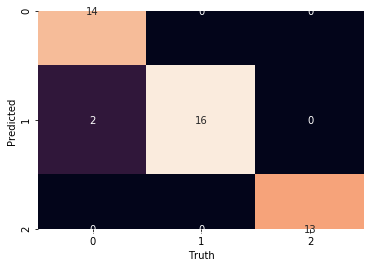

In [41]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred, y_test)
names = np.unique(y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
print({'Iris-versicolor':0 , 'Iris-virginica' : 1 , 'Iris-setosa' : 2})
print('Accuracy' , (14+16+13)/(14+16+13+2)*100)

------------------------------------------------------Random Forest------------------------------------------------------------

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 2 , random_state = 0)
clf.fit(X_train , y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
# probabilities of first 10 observations
clf.predict_proba(X_test)[0:10]

array([[0.  , 1.  , 0.  ],
       [0.78, 0.22, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.84, 0.16, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.95, 0.05, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ]])

In [45]:
pd.crosstab(y_test , y_pred , rownames = ['Actual Species'] , colnames = ['Predict Species'])

Predict Species,0,1,2
Actual Species,,,
0,15,1,0
1,1,15,0
2,0,0,13


In [46]:
print('Accuracy' , (15+16+13)/(15+16+13+1)*100)

Accuracy 97.77777777777777


-----------------------------------------Support Vector Machine(Linear Kernel)-------------------------------------------------

In [47]:
from sklearn.svm import SVC
model = SVC(kernel = "linear")

In [48]:
model.fit(X_train , y_train)

SVC(kernel='linear')

In [49]:
y_pred = model.predict(X_test)

In [50]:
print("Accuracy:" , accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [51]:
pd.crosstab(y_test , y_pred , rownames = ['Actual Species'] , colnames = ['Predict Species'])

Predict Species,0,1,2
Actual Species,,,
0,15,1,0
1,0,16,0
2,0,0,13


---------------------------------------Support Vector Machine(Polynomial Kernel)-----------------------------------------------

In [52]:
# from sklearn.svm import SVC
# Polynomial with degree 3
# If we don't specify degree than it will take degree = 3
model = SVC(kernel = "poly" , degree = 3)

In [53]:
model.fit(X_train , y_train)

SVC(kernel='poly')

In [54]:
y_pred = model.predict(X_test)

In [55]:
print("Accuracy:" , accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [56]:
pd.crosstab(y_test , y_pred , rownames = ['Actual Species'] , colnames = ['Predict Species'])

Predict Species,0,1,2
Actual Species,,,
0,15,1,0
1,0,16,0
2,0,0,13


-------------------------------------Support Vector Machine(Radial Basis Function Kernel)--------------------------------------

In [57]:
# model = SVC(kernel = 'rbf' , gamma = 0.7)
# model.fit(X_train , y_train)
# 2 lines to 1 line
model = SVC(kernel = 'rbf' , gamma = 0.7).fit(X_train , y_train)

In [58]:
y_pred = model.predict(X_test)

In [59]:
print("Accuracy:" , accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [60]:
pd.crosstab(y_test , y_pred , rownames = ['Actual Species'] , colnames = ['Predict Species'])

Predict Species,0,1,2
Actual Species,,,
0,15,1,0
1,0,16,0
2,0,0,13


----------------------------------------------Linear Support Vector Machine----------------------------------------------------

In [61]:
from sklearn.svm import LinearSVC
model = LinearSVC().fit(X_train , y_train)

In [62]:
y_pred = model.predict(X_test)

In [63]:
print("Accuracy:" , accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


In [64]:
pd.crosstab(y_test , y_pred , rownames = ['Actual Species'] , colnames = ['Predict Species'])

Predict Species,0,1,2
Actual Species,,,
0,12,4,0
1,0,16,0
2,0,0,13


-------------------------------------------------K means Cluster---------------------------------------------------------------

In [65]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3).fit(X)

In [66]:
y_pred = model.predict(X)

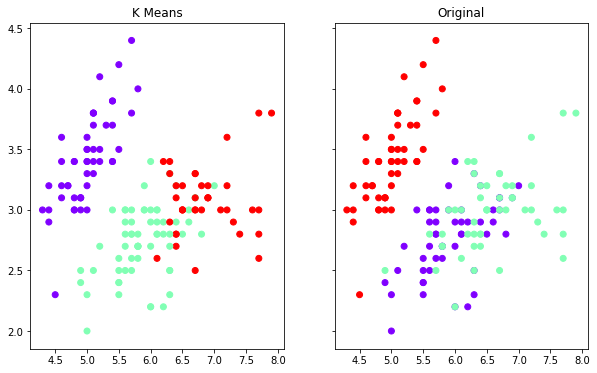

In [67]:
# By graph we can see data is mixed thats why model can't predict correctly
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data['SepalLength'],data['SepalWidth'],c=model.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data['SepalLength'],data['SepalWidth'],c=y,cmap='rainbow')

Text(0, 0.5, 'WCSS')

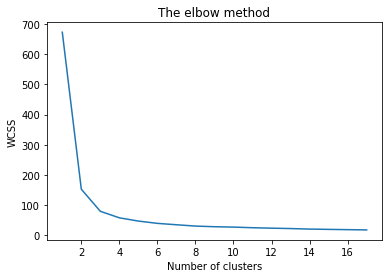

In [68]:
wcss = []

for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 18), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

-----------------------------------------------------Neural Network------------------------------------------------------------

In [71]:
import neurolab as nl
# sl -> sepal length , sw -> sepal width , pl -> petal lenght , pw -> petal width
# SepalLength SepalWidth PetalLength PetalWidth
sl_min , sl_max = data[: , 'SepalLength'].min() , data[: , 'SepalLength'].max()
sw_min , sw_max = X[: , 'SepalWidth'].min() , X[: , 'SepalWidth'].max()
pl_min , pl_max = X[: , 'PetalLength'].min() , X[: , 'PetalLength'].max()
pw_min , pw_max = X[: , 'PetalWidth'].min() , X[: , 'PetalWidth'].max()
output = label.shape[1]

sl = [sl_min , sl_max]
sw = [sw_min , sw_max]
pl = [pl_min , pw_max]
pw = [pw_min , pw_max]

model = nl.net.newp([sl , sw , pl , pw] , output)

TypeError: '(slice(None, None, None), 'SepalLength')' is an invalid key